<a href="https://colab.research.google.com/github/2d1ff1cult/SPARK2/blob/main/SPARK2_RocketCEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook for testing RocketCEA

some todo:
- cross validate with actual CEA data
- validate with current MATLAB code
- validate using $CH4 (F)$ and $O2L (O)$ as seen in [this video](https://www.youtube.com/watch?v=9urwkTG6sCs&t=147s)

Link to RocketCEA
https://rocketcea.readthedocs.io/en/latest/quickstart.html

unrelated note:
how the heck did i find this? i was for something that tabulated cea raw data since team-written MATLAB code was buggy at times

In [2]:
!pip install RocketCEA

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for RocketCEA: filename=rocketcea-1.2.0-cp310-cp310-linux_x86_64.whl size=5122702 sha256=70197230ee43f6150806ef7650c500fe1b11c130ff6d8ac1707e93ef243a30ab
  Stored in directory: /root/.cache/pip/wheels/b5/c7/42/975a9c3844aa5ba798b92814c5b2a615e4d2eb020cc3a4130f
Successfully built RocketCEA


# Some notes:
rocketcea:
- you can follow sample code, but i advise you `import matplotlib.pyplot as plt` instead of `from pylab import *` since the use of the latter has been deprecated/discouraged by matplotlib devs

matplotlib:
- you can keep plotting data before `plt.show()` to add more "graphs" to a plot
- more graphs can be added via a loop and plotting through `ax`
- `plt` plots on the entire plot, whereas with `fig, ax = plt.subplots()`, `ax` will plot on a different set of data

technical:
- on a conventional converging diverging nozzle, the eps or gamma value MUST be greater than 1, otherwise, you are not working with a converging diverging nozzle.
  - $ A_e/A_t $ refers to the area of the exit and area of at the throat; if the throat area is larger than the area of the exit, then you are not working with a converging diverging nozzle
  - when $A_e$ is larger than $A_t$, then the ratio is larger than 1, else the value is less than 1.
- there are no magical list of parameters that can be optimized for a given propellant (i.e. fuel/ox mixture) that grants you more specific impulse
  - it all comes down to fundamental chemical properties of the fuel/ox mix (specifically enthalpy, molar mass, etc.)

non-technical:

markdown:
- latex is cool and useful for writing equations (google for more information but the syntax is something like this: `${I_\text{sp}}$` to display ${I_\text{sp}}$)

# do not use (unless testing matplotlib issues)

In [52]:
%matplotlib inline

# $C*$ Plot test at different pressures

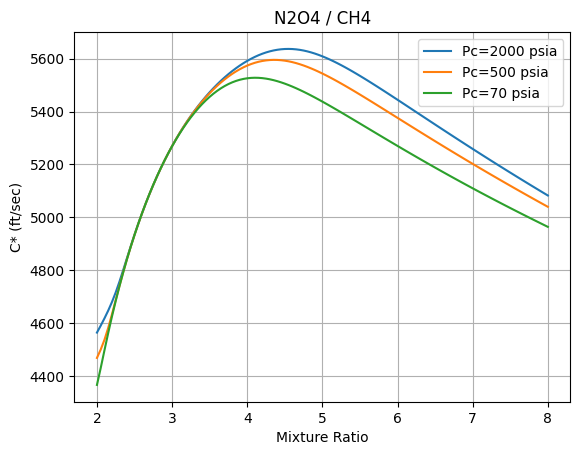

In [18]:
from rocketcea.cea_obj import CEA_Obj
from pylab import *

# sample pcL from quickstart guide of rocketcea
pcL = [2000., 500., 70.]

# note that you can use common ox/fuels' equations
ispObj = CEA_Obj(propName='', oxName='N2O4', fuelName="CH4")

for Pc in pcL:
  cstararr = []
  MR = 2.0
  mrarr = []
  while MR < 8.0:
    cstararr.append(ispObj.get_Cstar( Pc=Pc, MR=MR))
    mrarr.append(MR)
    MR += 0.05
  plot(mrarr,cstararr,label='Pc=%g psia'%Pc)

legend(loc='best')
grid(True)
title(ispObj.desc)
xlabel('Mixture Ratio')
ylabel('C* (ft/sec)')

show()

# Variable Area Ratios Plot

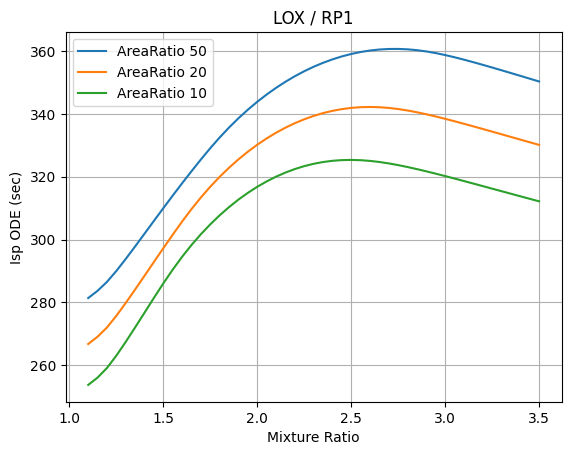

In [6]:
from rocketcea.cea_obj import CEA_Obj
from pylab import *

Pc = 500.0

ispIRFNA = CEA_Obj(propName='', oxName='LOX', fuelName="RP1")
for e in [50.0,20.0,10.0]:
    ispArr = []
    MR = 1.1
    mrArr = []
    while MR < 3.5:
        ispArr.append( ispIRFNA(Pc, MR, e ))
        mrArr.append(MR)
        MR += 0.05
    plot(mrArr, ispArr, label='AreaRatio %g'%e)

legend(loc='best')
grid(True)
title( ispIRFNA.desc )
xlabel( 'Mixture Ratio' )
ylabel( 'Isp ODE (sec)' )
# savefig('cea_plot.png', dpi=120)

show()

# Simultaneous $MR$ v. ${I_\text{sp}}$ graphs

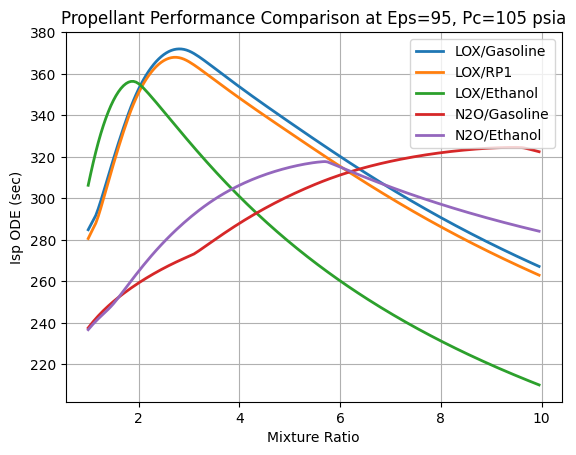

In [55]:
from rocketcea.cea_obj import CEA_Obj
from pylab import *

Pc = 105.0
eps = 95.0
mrMin = 1.0
mrStep = 0.05 # adjust for precision
mrMax = 10.0

mrL = [mrMin + i*mrStep for i in range( int((mrMax-mrMin)/mrStep))]
ispLL = [] # a list of lists of Isp data

fuels = [
    ('LOX','RP1'),
    ('LOX','Ethanol'),
    ('N2O','Ethanol'),
    ('LOX','Gasoline'),
    ('N2O','Gasoline'),
]

for oxName,fuelName in fuels:

    ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )

    ispL = [ispObj.get_Isp(Pc=Pc, MR=MR, eps=eps) for MR in mrL]
    ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

ispLL.sort(reverse=True) # sort in-place from high to low

for maxIsp, name, ispL in ispLL:
    plot(mrL, ispL, label=name, linewidth=2)

legend(loc='best')
grid(True)
title( 'Propellant Performance Comparison at Eps=%g, Pc=%g psia'%(eps,Pc) )
xlabel( 'Mixture Ratio' )
ylabel( 'Isp ODE (sec)' )

show()

# Simulataneous $\epsilon$ vs ${I_\text{sp}}$
## not a useful calculator, just builds intuition
just a demonstration that expansion ratio acts like a multiplier that affects specific impulse.

also that $\epsilon$ or $\gamma$ can be the area ratio between the size of the universe and an atom, and your ${I_\text{sp}}$ will not change

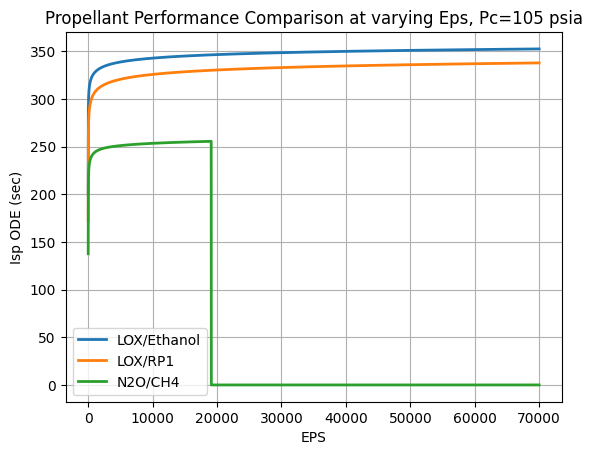

In [7]:
from rocketcea.cea_obj import CEA_Obj
from pylab import *

Pc = 105.0
epsMin = 1.0
epsMax = 70000.0
epsStep = 10
MR = 1.0

epsL = [epsMin + i*epsStep for i in range( int((epsMax-epsMin)/epsStep))]
ispLL = [] # a list of lists of Isp data

for oxName,fuelName in [('LOX','RP1'), ('N2O','CH4'),('LOX','Ethanol')]:
    ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )

    ispL = [ispObj.get_Isp(Pc=Pc, MR=MR, eps=eps) for eps in epsL]
    ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

ispLL.sort(reverse=True) # sort in-place from high to low

for maxIsp, name, ispL in ispLL:
    plot(epsL, ispL, label=name, linewidth=2)

legend(loc='best')
grid(True)
title( 'Propellant Performance Comparison at varying Eps, Pc=%g psia'%(Pc) )
xlabel( 'EPS' )
ylabel( 'Isp ODE (sec)' )

show()

# O/F vs. Isp with sliders
TODO: add peaks for stoichiometric ratio

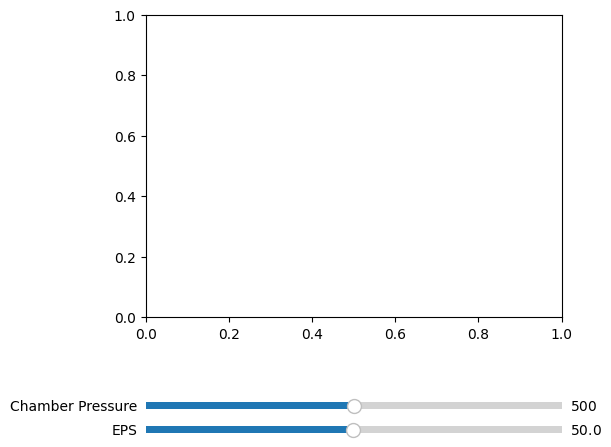

In [16]:
from rocketcea.cea_obj import CEA_Obj
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button, Slider

Pc = 500.0
eps = 27.0
mrMin = 0
mrStep = 0.1
mrMax = 10.0

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

boxeps = fig.add_axes([0.25, 0, 0.65, 0.03])
slidereps = Slider(
    ax=boxeps,
    label='EPS',
    valmin=0.1,
    valmax=100,
    valinit=50,
    orientation="horizontal"
)

boxpc = fig.add_axes([0.25, 0.05, 0.65, 0.03])
sliderpc = Slider(
    ax=boxpc,
    label="Chamber Pressure",
    valmin=0,
    valmax=1000,
    valinit=500,
    orientation="horizontal"
)

fuels = [
    ('LOX','RP1'),
    ('LOX','Ethanol'),
    ('N2O','Ethanol'),
    ('LOX','Gasoline'),
    ('N2O','Gasoline'),
]

# The function to be called anytime a slider's value changes
def update(val):
    ax.clear()
    Pc = sliderpc.val
    eps = slidereps.val
    mrL = [mrMin + i*mrStep for i in range( int((mrMax-mrMin)/mrStep))]
    ispLL = [] # a list of lists of Isp data
    for oxName,fuelName in fuels:

        ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )

        ispL = [ispObj.get_Isp(Pc=sliderpc.val, MR=MR, eps=slidereps.val) for MR in mrL]
        ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

    ispLL.sort(reverse=True) # sort in-place from high to low

    for maxIsp, name, ispL in ispLL:
        ax.plot(mrL, ispL, label=name, linewidth=2)

    ax.legend(loc='best')
    ax.grid(True)
    plt.title( 'Performance Comparison at Eps=%g, Pc=%g psia'%(eps,Pc),loc='center')
    ax.set_xlabel( 'Mixture Ratio' )
    ax.set_ylabel( 'Isp ODE (sec)' )
    print('Pc set to: %g  EPS set to: %g'%(Pc,eps))
    fig.canvas.draw_idle()

# register the update function with each slider
slidereps.on_changed(update)
sliderpc.on_changed(update)

plt.show()

# User prompted EPS adjustment

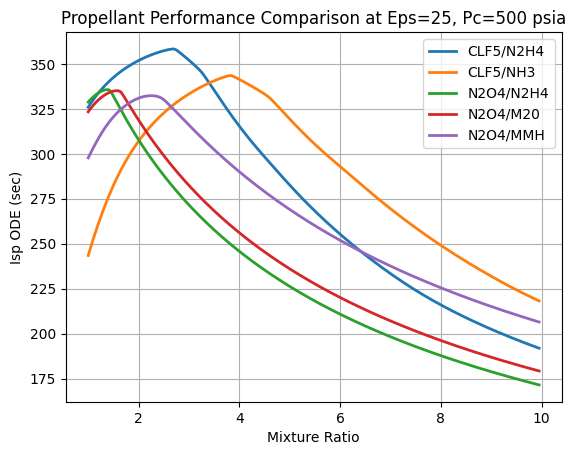

KeyboardInterrupt: Interrupted by user

In [15]:
%matplotlib inline
from rocketcea.cea_obj import CEA_Obj
import matplotlib.pyplot as plt

Pc = 500.0
eps = 25.0
mrMin = 1.0
mrStep = 0.05
mrMax = 10.0


def plot_and_update(eps):
  """Plots the data and prompts for new eps value."""
  plt.cla()
  mrL = [mrMin + i*mrStep for i in range( int((mrMax-mrMin)/mrStep))]
  ispLL = [] # a list of lists of Isp data
  fuelox = [('N2O4','N2H4'),('N2O4','MMH'),('N2O4','M20'),
                          ('CLF5','N2H4'),('CLF5','NH3')]
  for oxName, fuelName in fuelox:
    ispObj = CEA_Obj( oxName=oxName, fuelName=fuelName )
    ispL = [ispObj.get_Isp(Pc=Pc, MR=MR, eps=eps) for MR in mrL]
    ispLL.append( [max(ispL), '%s/%s'%(oxName,fuelName), ispL] )

  ispLL.sort(reverse=True) # sort in-place from high to low

  for maxIsp, name, ispL in ispLL:
    plt.plot(mrL, ispL, label=name, linewidth=2)

  plt.legend(loc='best')
  plt.grid(True)
  plt.title( 'Propellant Performance Comparison at Eps=%g, Pc=%g psia'%(eps,Pc) )
  plt.xlabel( 'Mixture Ratio' )
  plt.ylabel( 'Isp ODE (sec)' )

  plt.show()

  new_eps = input("Enter new eps value (or 'q' to quit): ")
  if new_eps.lower() != 'q':
    try:
      new_eps = float(new_eps)
      # Clear the plot for redraw
      plt.cla()
      plot_and_update(new_eps)
    except ValueError:
      print("Invalid input. Please enter a number.")

plot_and_update(eps)  # initial plot

# Multiple y axes test
following https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
Trying to learn how to have multiple y axes; feel free to collapse this cell

AttributeError: 'CEA_Obj' object has no attribute 'get_temperatures'

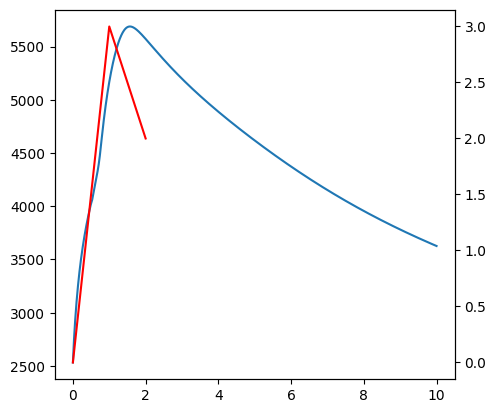

In [14]:
import matplotlib.pyplot as plt
from rocketcea.cea_obj import CEA_Obj

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)


# sample pcL from quickstart guide of rocketcea
pcL = [800., 100., 70.]

# note that you can use common ox/fuels' equations
ispObj = CEA_Obj(propName='', oxName='LOX', fuelName="C2H5OH")

for Pc in pcL:
  cstararr = []
  MR = 0.0
  mrarr = []
  label = []
  while MR < 10.0:
    cstararr.append(ispObj.get_Cstar( Pc=Pc, MR=MR))
    mrarr.append(MR)
    MR += 0.01 # smaller for more precise data

  cstar = ax # defining primary plot
  temp = ax.twinx()

  temp.spines.right.set_position(("axes", 1))

  cstarplot, = ax.plot(mrarr,cstararr,label='Pc=%g psia'%Pc) # defining cstarplot as primary
  #TODO: add fuel stuff vs. temperature, currently just sample data
  # tempplot, = temp.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
  tempplot, = temp.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
  print(ispObj.get_temperatures(Pc=Pc, MR=MR,  ))
  cstar.set_xlabel('Mixture Ratio (O/F)')
  cstar.set_ylabel('C* (ft/sec)')
  temp.set_ylabel("Temperature")

  cstar.legend(loc='upper right')
  temp.legend(loc='lower right')
  cstar.grid(True)
  plt.title("Ox / Fuel: " + ispObj.desc)

plt.show()

# matplotlib multi axis

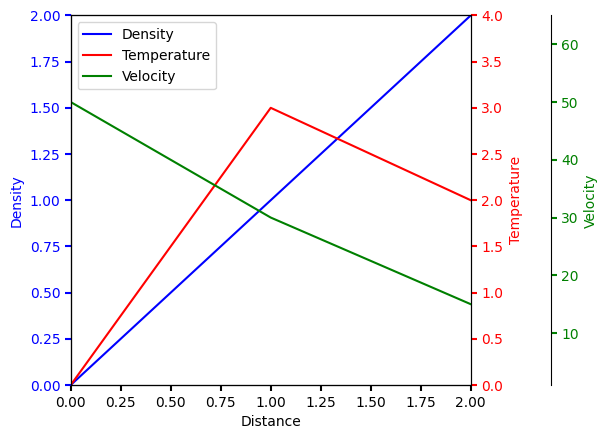

In [59]:
#modified variable names for clarity
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

rho = ax
t = ax.twinx()
v = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
v.spines.right.set_position(("axes", 1.2))

rhoplot, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
tplot, = t.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
vplot, = v.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
t.set_ylim(0, 4)
v.set_ylim(1, 65)

rho.set_xlabel("Distance")
rho.set_ylabel("Density")
t.set_ylabel("Temperature")
v.set_ylabel("Velocity")

rho.yaxis.label.set_color(rhoplot.get_color())
t.yaxis.label.set_color(tplot.get_color())
v.yaxis.label.set_color(vplot.get_color())

tkw = dict(size=4, width=1.5)
rho.tick_params(axis='y', colors=rhoplot.get_color(), **tkw)
t.tick_params(axis='y', colors=tplot.get_color(), **tkw)
v.tick_params(axis='y', colors=vplot.get_color(), **tkw)
rho.tick_params(axis='x', **tkw)

rho.legend(handles=[rhoplot, tplot, vplot])

plt.show()

# TODO: add simulataneous graphs for pressure, temp at different chamber locations